In [1]:

#add citation https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from Util import loadBeer,loadWine
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import time
from mpl_toolkits.mplot3d import axes3d, Axes3D
def bic_curve(X_train,models):
    bicValues= [m.bic(X_train) for m in models]
    minTest = min(bicValues)
    minPos= bicValues.index(minTest)
    plt.annotate('Number of Clusters in Min Value: '+str(minPos), xy=(minPos, minTest), xytext=(minPos, minTest+5),
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
    plt.plot(components,bicValues , label='BIC')
    plt.legend()

In [2]:
X_train, X_test, y_train, y_test= loadBeer()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Dan\Documents\notebooks\MachineLearning\assignment3\dpolenik3\Util.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  recipes_train.loc[maskHigh, column_name] = 120
C:\Users\Dan\Documents\notebooks\MachineLearning\assignment3\dpolenik3\Util.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  recipes_train.loc[maskLow

In [3]:
scores =[]
timeTaken=[]
models=[]
components=range(1,40)
for k in components:
    gmm = GaussianMixture(n_components=k)
    start = time.time()
    scores.append(gmm.fit(X_train).score(X_train))    
    end = time.time()
    totalTime = end -start
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    timeTaken.append(totalTime)
    models.append(gmm)

Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...
Training k = 20 clusters...
Training k = 25 clusters...
Training k = 30 clusters...
Training k = 35 clusters...


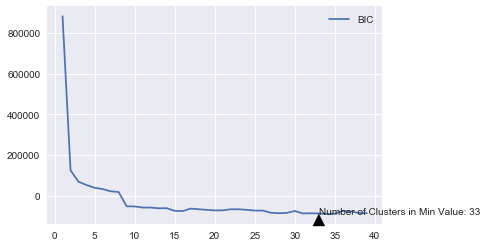

In [4]:
bicValues= [m.bic(X_train) for m in models]
minTest = min(bicValues)
minPos= bicValues.index(minTest)
plt.annotate('Number of Clusters in Min Value: '+str(minPos), xy=(minPos, minTest), xytext=(minPos, minTest+5),
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
plt.plot(components,bicValues , label='BIC')

plt.legend()

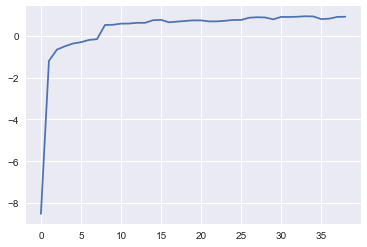

In [5]:
plt.plot(scores, label="score")

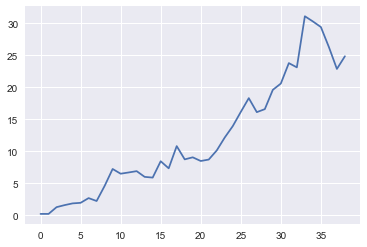

In [6]:
plt.plot(timeTaken, label="Training Time")

In [7]:
gmm = GaussianMixture(n_components=10)
gmm.fit(X_train)
y_gmm = gmm.predict(X_train)

Text(0.5,0,'Color')

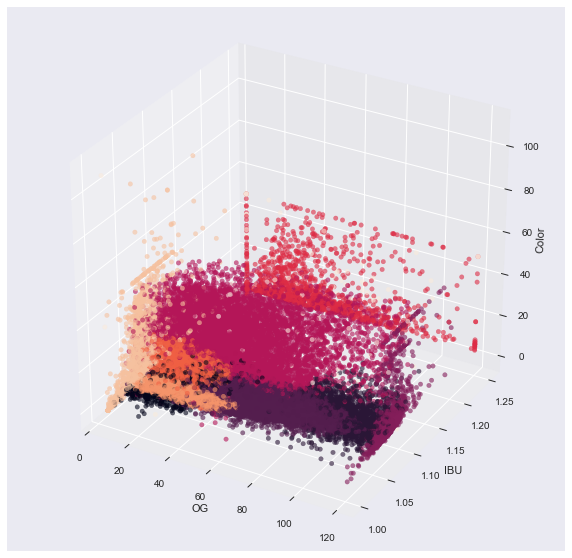

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ys = X_train[['OG']].values.flatten()
zs = X_train[['Color']].values.flatten()
xs = X_train[['IBU']].values.flatten()

ax.scatter(xs, ys, zs, alpha=0.6, c=y_gmm)
ax.set_xlabel('OG')
ax.set_ylabel('IBU')
ax.set_zlabel('Color')

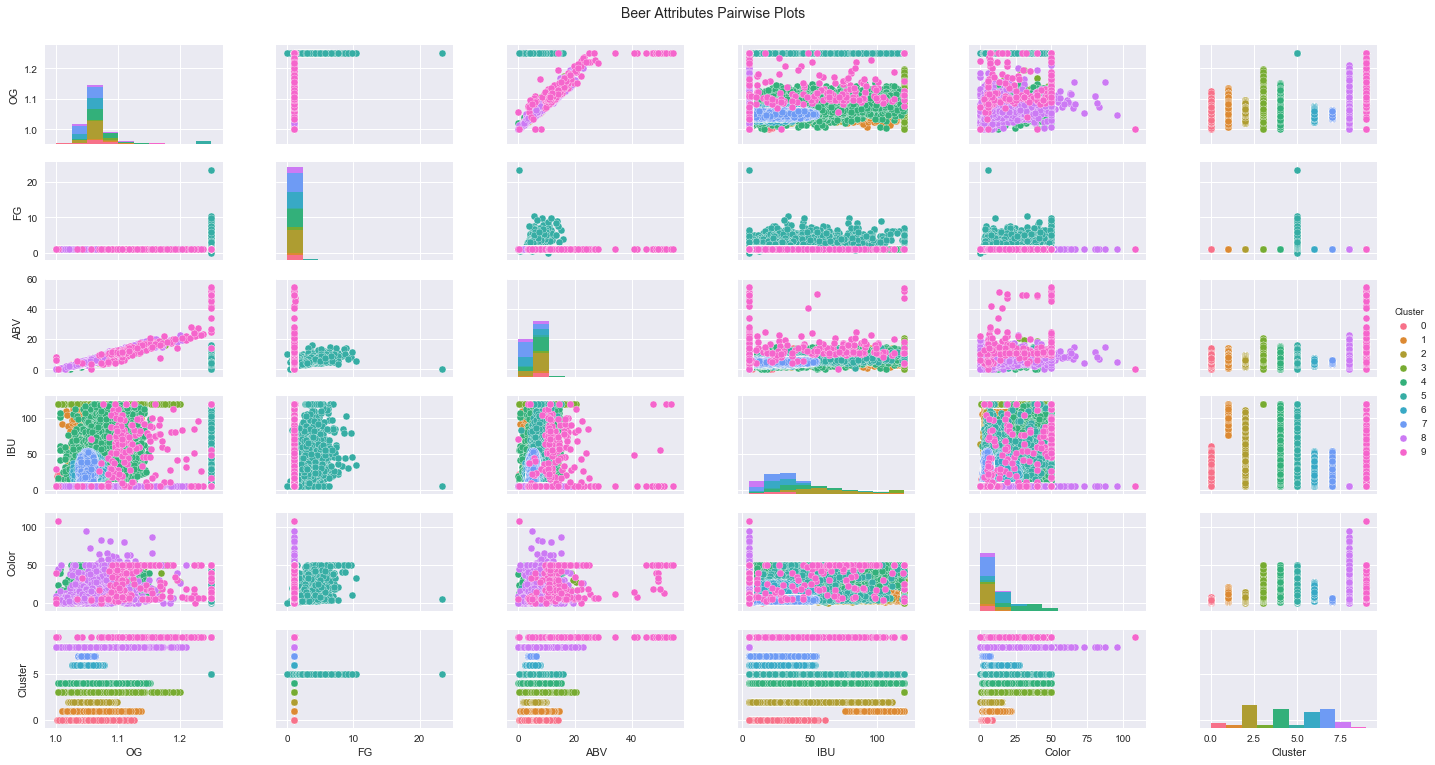

In [9]:
X_train['Cluster'] =y_gmm
cols = ['OG','FG','ABV','IBU','Color','Cluster']
pp = sns.pairplot(X_train[cols], hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)

# Wine

In [10]:
X_train, X_test, y_train, y_test= loadWine()

In [11]:
scores =[]
timeTaken=[]
models=[]
components=range(1,40)
for k in components:
    gmm = GaussianMixture(n_components=k)
    start = time.time()
    scores.append(gmm.fit(X_train).score(X_train))    
    end = time.time()
    totalTime = end -start
    if k % 5 == 0:
        print("Training k = "+str(k)+" clusters...")
    timeTaken.append(totalTime)
    models.append(gmm)
    


Training k = 5 clusters...
Training k = 10 clusters...
Training k = 15 clusters...
Training k = 20 clusters...
Training k = 25 clusters...
Training k = 30 clusters...
Training k = 35 clusters...


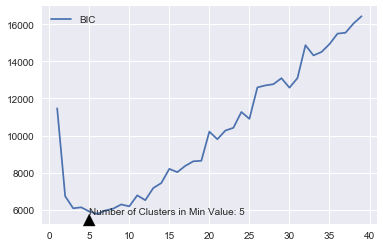

In [12]:
bic_curve(X_train,models)

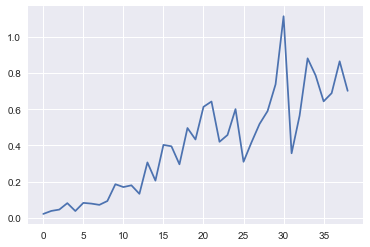

In [13]:
plt.plot(timeTaken, label="Training Time")

In [14]:
gmm = GaussianMixture(n_components=10)
gmm.fit(X_train)
y_gmm = gmm.predict(X_train)

Text(0.5,0,'citric acid')

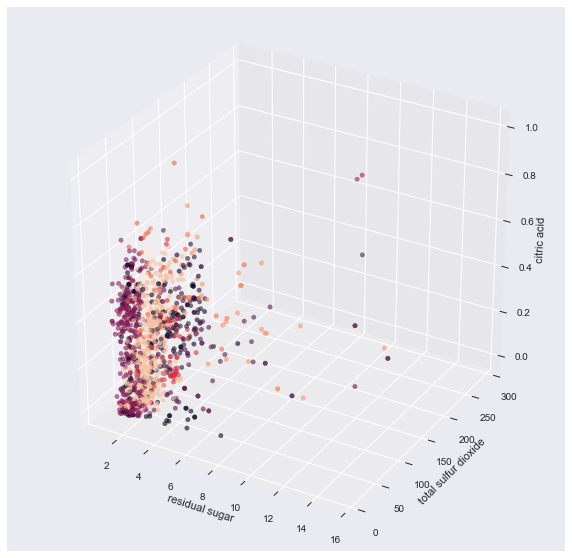

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ys = X_train[['total sulfur dioxide']].values.flatten()
xs = X_train[['residual sugar']].values.flatten()
zs = X_train[['citric acid']].values.flatten()

ax.scatter(xs, ys,zs,  alpha=0.6, c=y_gmm)
ax.set_xlabel('residual sugar')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('citric acid')

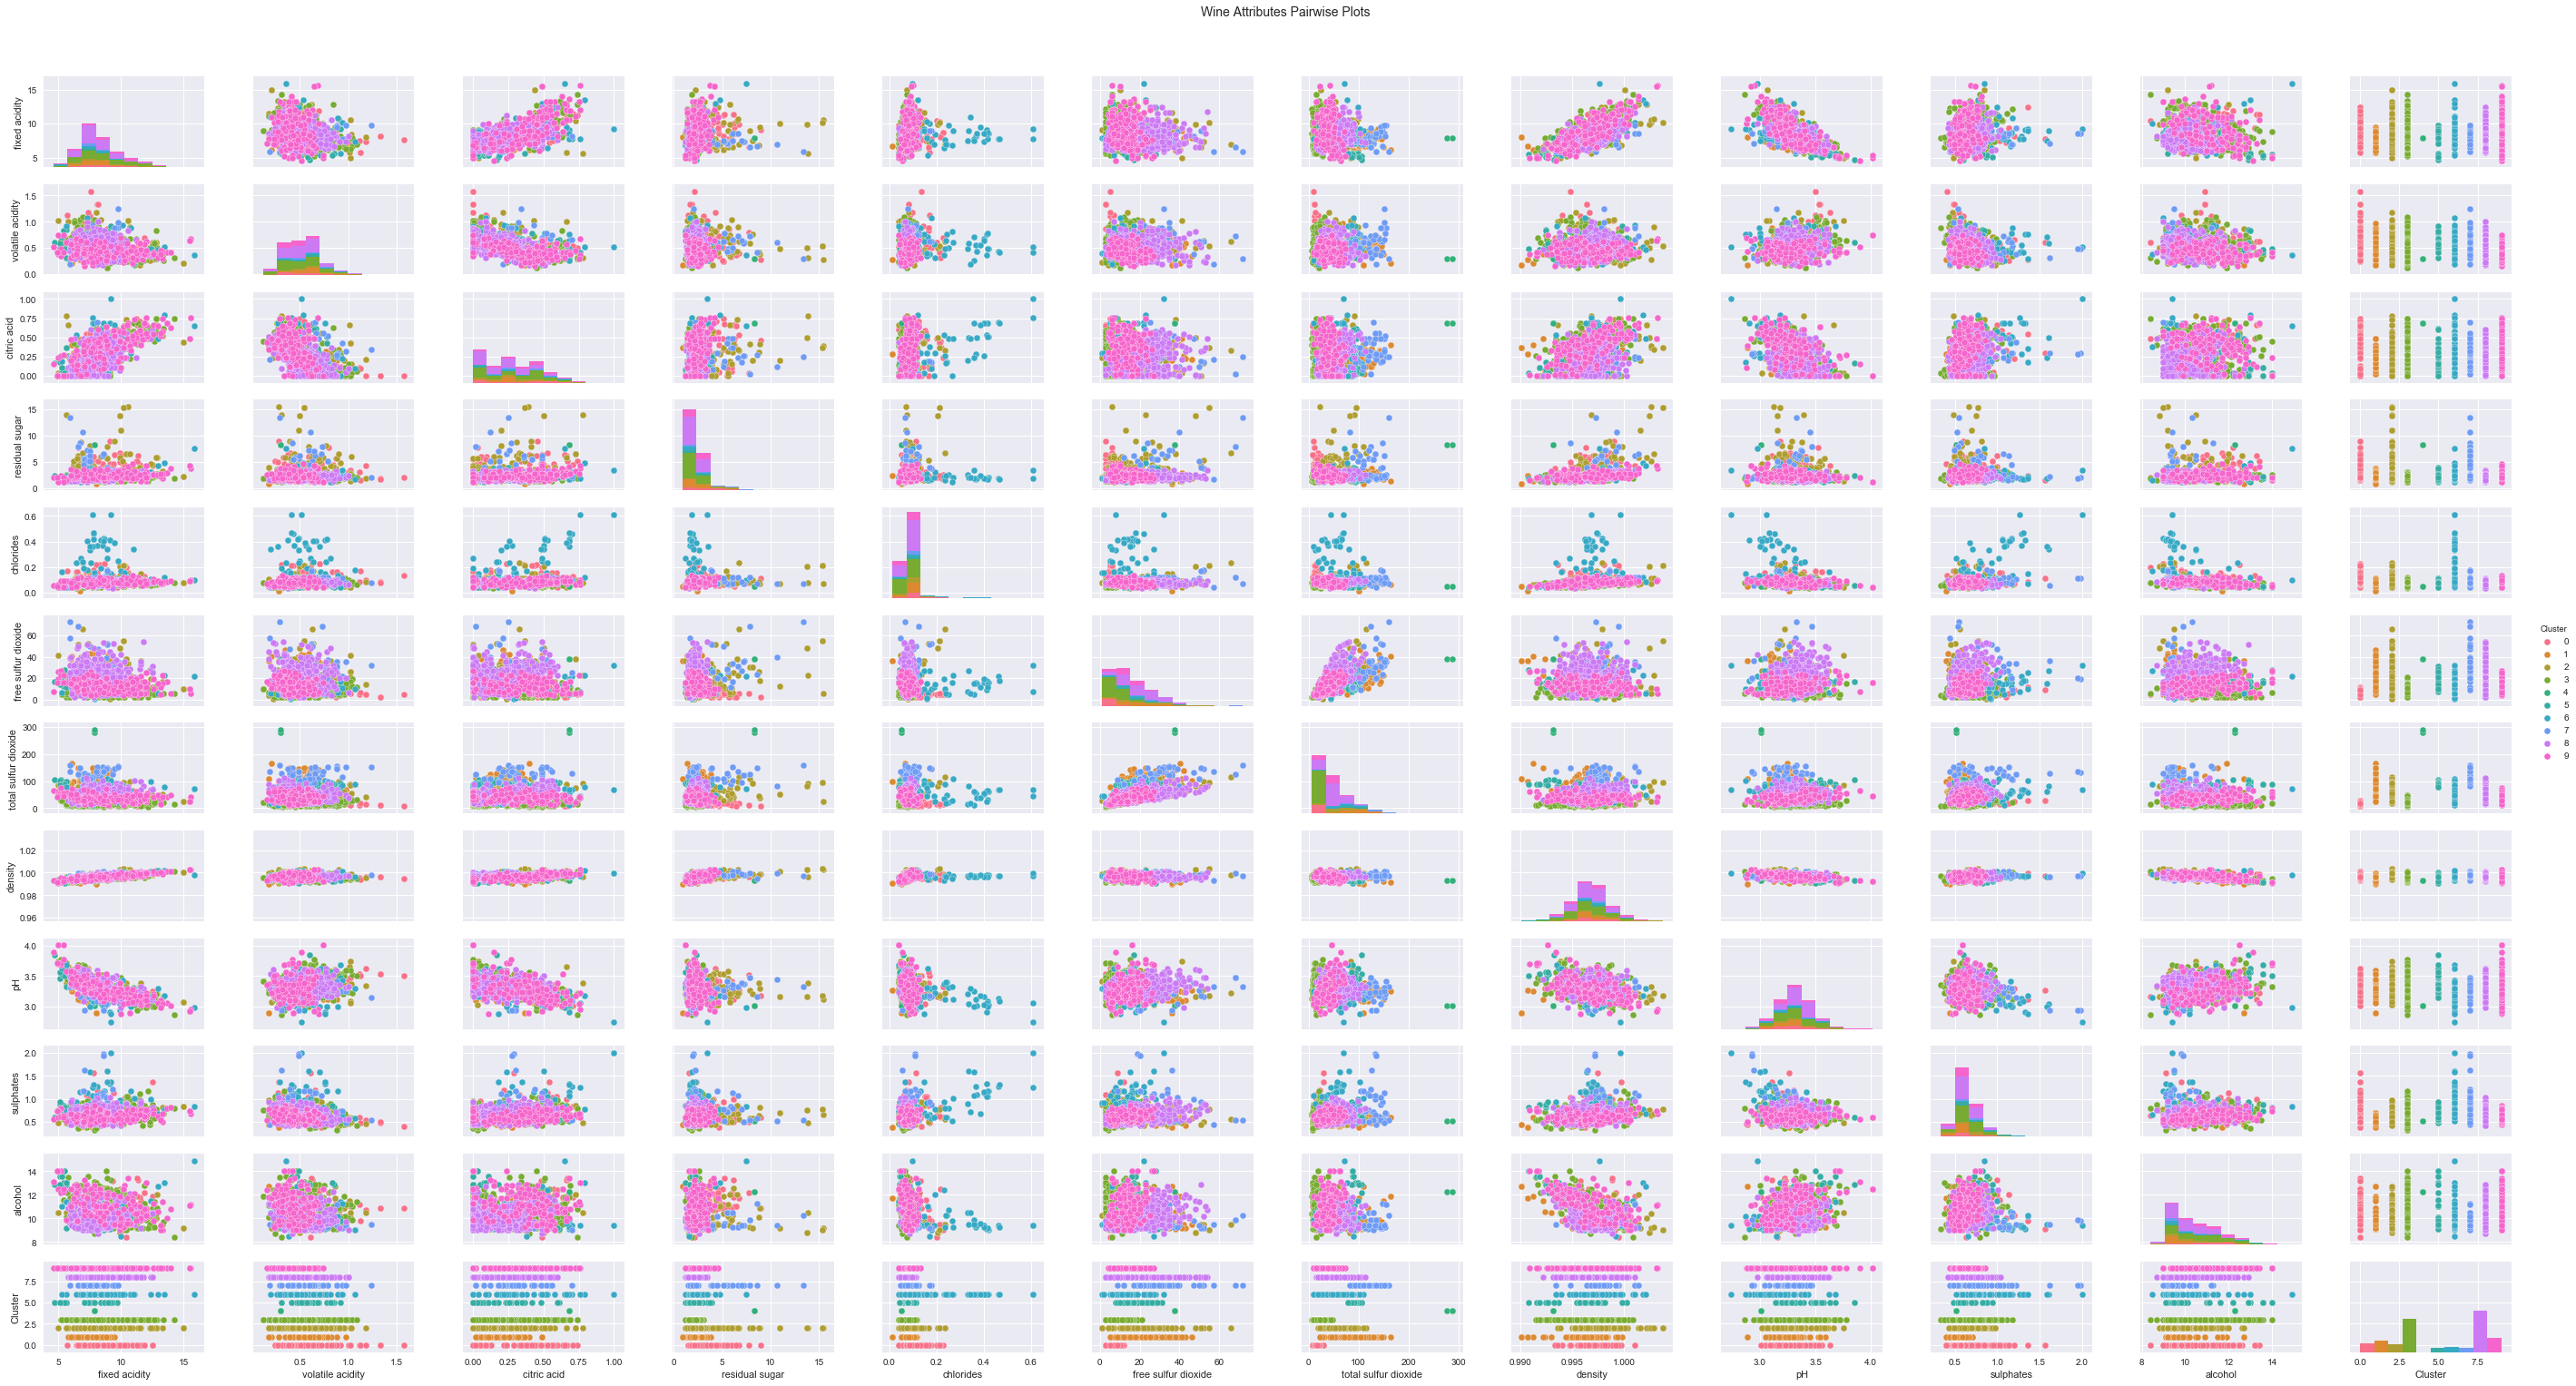

In [20]:
# Scatter Plot with Hue for visualizing data in 3-D
X_train['Cluster'] =y_gmm
pp = sns.pairplot(X_train, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)